In [1]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import rioxarray as rxr
from datetime import datetime, date
import json
from xgrads import open_CtlDataset
import geopandas as gpd
import requests
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import folium 
%matplotlib inline

In [2]:
# Choose a domain
domain = 'BRIS'

# Path to the SnowModel folder
SMpath = '/nfs/attic/dfh/2020_NPRB/domain_'+domain+'/snowmodel2023_cfsv2/'
# stream gage data 
gagepath = '/nfs/attic/dfh/2020_NPRB/data/stream_gage/'+domain+'/'
# ET data
etpath = '/nfs/attic/dfh/2020_NPRB/data/modis_ET/'+domain+'/'
# datapath
datapath = '/nfs/attic/dfh/2020_NPRB/data/SMinputs/'+domain+'/'
# prec ctl file
ctlFilePREC = SMpath+'ctl_files/wo_assim/prec_base.ctl'

#path to NPRB domains
domains_resp = requests.get("https://raw.githubusercontent.com/NPRB/02_preprocess_python/main/NPRB_domains.json")
domains = domains_resp.json()

# DATES
st_dt = '2011-10-01'
ed_dt = '2018-09-30'

In [3]:
# # open modified et file
# ctlFile = SMpath+'ctl_files/wo_assim/etx.ctl'

# et = open_CtlDataset(ctlFile)
# et

In [4]:
# # load ET data 
# # historical ET data - domain
# EThist_path = '/nfs/attic/dfh/2020_NPRB/data/climate_na_et/Normal_1991_2020_monthly/'+domain+'/historic_daily_et.nc'
# climatena = xr.open_dataset(EThist_path)
# #convert mm to m 
# et_m = climatena.et/1000
# # set all pixels to 0 where it is undefined in SM
# climatena['et_m'] = et_m
# climatena

In [5]:
# load station discharge data
path=gagepath+domain+'_discharge_cfs_'+st_dt+'_'+ed_dt+'.csv'
Q = pd.read_csv(path,parse_dates=['datetimeUTC'],infer_datetime_format=True,index_col='datetimeUTC')
Q

,USGS:15298040:00060:00003,USGS:15300520:00060:00003,USGS:15301500:00060:00003,USGS:15302000:00060:00003,USGS:15302300:00060:00003,USGS:15302320:00060:00003,USGS:15302812:00060:00003,USGS:15303900:00060:00003,USGS:15304000:00060:00003,USGS:15304010:00060:00003
datetimeUTC,,,,,,,,,,
2011-10-01 00:00:00+00:00,NaN,658.0,1380.0,8110.0,6400.0,538.0,NaN,17300.0,41800.0,282.0
2011-10-02 00:00:00+00:00,NaN,652.0,1290.0,7910.0,6270.0,531.0,NaN,17100.0,40900.0,274.0
2011-10-03 00:00:00+00:00,NaN,651.0,1250.0,7780.0,6300.0,539.0,NaN,16900.0,40100.0,276.0
2011-10-04 00:00:00+00:00,NaN,655.0,1180.0,7690.0,6430.0,586.0,NaN,16700.0,39500.0,274.0
2011-10-05 00:00:00+00:00,NaN,654.0,1150.0,7530.0,6380.0,559.0,NaN,16500.0,39100.0,270.0
...,...,...,...,...,...,...,...,...,...,...
2018-09-26 00:00:00+00:00,NaN,NaN,NaN,5340.0,NaN,NaN,1180.0,35600.0,78000.0,1550.0
2018-09-27 00:00:00+00:00,NaN,NaN,NaN,5200.0,NaN,NaN,1060.0,36600.0,84000.0,1400.0
2018-09-28 00:00:00+00:00,NaN,NaN,NaN,5180.0,NaN,NaN,1310.0,36300.0,84200.0,1330.0


In [6]:
# load station metadata
path=gagepath+domain+'_gage_meta_proj_'+st_dt+'_'+ed_dt+'.geojson'
meta=gpd.read_file(path)
meta

,agency_cd,site_no,station_nm,site_tp_cd,lat_va,long_va,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,...,reliability_cd,gw_file_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd,project_no,geometry
0,USGS,15298040,CHULITNA R 5MI AB MOUTH NR PORT ALSWORTH AK,ST,601215.6,1544208.0,60.203659,-154.704435,G,1,...,None,Y,None,None,None,None,None,None,None,POINT (-38916.674 1135274.366)
1,USGS,15300520,KASKANAK C NR IGIUGIG AK,ST,592018.0,1560431.0,59.337622,-156.077443,G,S,...,None,Y,None,None,None,None,None,None,None,POINT (-117781.255 1040064.866)
2,USGS,15301500,ALLEN R NR ALEKNAGIK AK,ST,600917.0,1584404.0,60.153994,-158.736692,M,S,...,None,NYNNNNNN,None,None,None,None,None,None,None,POINT (-261858.623 1138855.835)
3,USGS,15302000,NUYAKUK R NR DILLINGHAM AK,ST,595608.0,1581116.0,59.934830,-158.190006,M,U,...,None,NNNNNNNN,None,None,None,None,None,None,None,POINT (-233224.290 1112362.774)
4,USGS,15302300,MULCHATNA R AB STUYAHOK R NR NEW STUYAHOK AK,ST,595018.0,1564130.0,59.837623,-156.693869,G,S,...,None,Y,None,None,None,None,None,None,None,POINT (-150445.478 1097183.963)
5,USGS,15302320,STUYAHOK R NR NEW STUYAHOK AK,ST,594835.0,1563953.0,59.809011,-156.666923,G,S,...,None,Y,None,None,None,None,None,None,None,POINT (-149069.859 1093926.244)
6,USGS,15302812,KOKWOK R 22 MI AB NUSHAGAK R NR EKWOK AK,ST,592454.0,1574815.0,59.415000,-157.804167,N,R,...,U,None,None,None,None,None,None,None,None,POINT (-215100.292 1053036.526)
7,USGS,15303900,KUSKOKWIM R AT LISKYS CROSSING NR STONY RIVER AK,ST,620307.0,1561238.0,62.051277,-156.212907,M,S,...,None,NYNNNNNN,None,None,None,None,None,None,None,POINT (-115347.992 1343629.810)
8,USGS,15304000,KUSKOKWIM R AT CROOKED CREEK AK,ST,615210.0,1580641.0,61.868744,-158.113785,M,T,...,None,NYNNNNNN,None,None,None,None,None,None,None,POINT (-215597.581 1327975.727)
9,USGS,15304010,CROOKED C AB AIRPORT RD NR CROOKED CREEK AK,ST,615324.0,1580916.0,61.889301,-158.156842,G,S,...,None,NYNNNNNN,None,None,None,None,None,None,None,POINT (-217707.423 1330410.497)


In [7]:
# #only need to do this for BEAU
# # 10 largest stations 
# # sort stations by upslope area
# stnmeta = meta.sort_values('drain_area_va',ascending = False)
# # select 10 largest stations
# stnmeta = stnmeta[0:10]
# # sort stations by station id area
# stnmeta = stnmeta.sort_values('site_no')
# # reset index
# stnmeta = stnmeta.reset_index(drop=True)
# # new station list
# stn_list = stnmeta.site_no.tolist()
# stn_list
# stnmeta

In [8]:
# load upslope watershed area masks
upslope = xr.open_dataset(gagepath+'upslope.nc')
upslope

<xarray.Dataset>
Dimensions:      (y: 1228, x: 949)
Coordinates:
    band         int64 ...
  * y            (y) float64 1.644e+06 1.644e+06 ... 4.185e+05 4.175e+05
  * x            (x) float64 -7.705e+05 -7.695e+05 ... 1.765e+05 1.775e+05
    spatial_ref  int64 ...
Data variables:
    14300520     (y, x) float32 ...
    15298040     (y, x) float32 ...
    15301500     (y, x) float32 ...
    15302000     (y, x) float32 ...
    15302300     (y, x) float32 ...
    15302500     (y, x) float32 ...
    15302812     (y, x) float32 ...
    15303900     (y, x) float32 ...
    15304000     (y, x) float32 ...
    15304010     (y, x) float32 ...

In [9]:
# station data 
gagepath = '/nfs/attic/dfh/2020_NPRB/data/stream_gage/'+domain+'/'
# all domains have the same start date
st_dt = '2011-10-01'
ed_dt = '2018-09-30'

stn = gpd.read_file(gagepath+domain+'_gage_meta_proj_'+st_dt+'_'+ed_dt+'.geojson')

<Axes: title={'center': 'band = 1, spatial_ref = 0'}, xlabel='x', ylabel='y'>

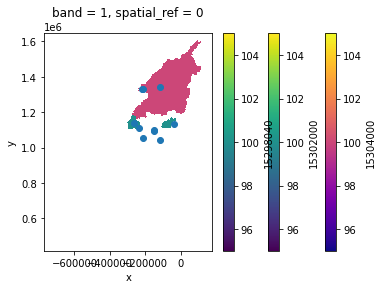

In [10]:
fig, ax = plt.subplots()
upslope['15304000'].plot(ax=ax,cmap='plasma')
upslope['15302000'].plot(ax=ax)
upslope['15298040'].plot(ax=ax)
stn.plot(ax=ax)


In [11]:
# a step before this notebook in QGIS:
# determine which watershed will be used to calculate the prec cf
#BRIS
stn_list = ['15304000','15302000','15298040']

### calculate weighted precip correction factor

In [33]:
# start_years_list = list(range(2001,2018))
# end_years_list = list(range(2003,2020))
start_years_list = list(range(int(st_dt[:4])+1,int(ed_dt[:4])))
end_years_list = list(range(int(st_dt[:4])+2,int(ed_dt[:4])+1))



specPs = np.empty([len(start_years_list),len(stn_list)])
specQs = np.empty([len(start_years_list),len(stn_list)])
specETs = np.empty([len(start_years_list),len(stn_list)])
Pcfs = np.empty([len(start_years_list),len(stn_list)])
numpixs = []

# prec data
P = open_CtlDataset(ctlFilePREC)
# P = P.rename({'lon': 'x', 'lat': 'y'})

# open modified et file
ctlFile = SMpath+'ctl_files/wo_assim/etx.ctl'
ET = open_CtlDataset(ctlFile)

for g in range(len(stn_list)):
    gage = stn_list[g]
    print(gage)
    #calculate number of pixels in upslope
    numpix = int(upslope[gage].where(upslope[gage]==100).count())
    numpixs.append(numpix)
    #         # calculate upslpe area
    #         wshedA=numpix*1000*1000
    # watershed area area
    wshedA=meta.drain_area_va[meta.site_no==gage].values[0]*2.59e6
    #print('ratio',wshedA/(numpix*1000*1000))
    for y in range(len(start_years_list)):
        styr = start_years_list[y]
        edyr = end_years_list[y]
        print('wy = ',edyr)

        # station name
        stn = 'USGS:'+gage+':00060:00003'
        # stn Q
        stnQ = Q[stn][str(styr)+'-10-01' :str(edyr)+'-09-30']
        if len(stnQ[stnQ.isnull()])/len(stnQ)>.1:
            print('missing more than 10% of days')
            specPs[y,g]=np.nan
            specQs[y,g]=np.nan
            specETs[y,g]=np.nan
            Pcfs[y,g]=np.nan
            continue
        else:
            # convert stn units of cfs to m^3/d
            stnq = stnQ*60*60*24/35.3147
            # prec data
            p = P.sel(time=slice(str(styr)+'-10-01',str(edyr)+'-09-30'))
            #add upslope mask
            p['mask'] = (['lat', 'lon'],  np.flipud(upslope[gage].values))
            # specific precipitation
            psum = p.prec.sum(dim='time')
            specP=np.nansum(psum.where((p.mask==100)&(psum>0)).values)/numpix
            specPs[y,g]=specP
            #et data
            et = ET.sel(time=slice(str(styr)+'-10-01',str(edyr)+'-09-30'))
            #add upslope mask
            et['mask'] = (['lat', 'lon'],  np.flipud(upslope[gage].values))
            # specific precipitation
            etsum = et.etx.sum(dim='time')
            specET=np.nansum(etsum.where((et.mask==100)&(etsum>0)).values)/numpix
            specETs[y,g]=specET
            # specific discharge 
            specQ=stnq.sum()/wshedA
            specQs[y,g]=specQ
            # # specific ET
            # et_tot = climatena.et_m.sum(dim='time')
            # specET = et_tot.where(climatena.mask==1).sum().values/numpix
            # specETs[y,g]=specET
            # correction factor 
            Pcfs[y,g]=(specQ+specET)/specP
            # Pcfs[y,g]=specQ/specP
            print('specP',specP)
            print('specQ',specQ)
            print('specET',specET)


15304000
wy =  2013
specP 0.7097365558472315
specQ 0.47019135023959835
specET 0.18033267220059018
wy =  2014
specP 0.8911448087260516
specQ 0.528806566302206
specET 0.221137253389427
wy =  2015
specP 0.9153456737817485
specQ 0.3829944581924777
specET 0.2211072983102986
wy =  2016
specP 1.023549195246031
specQ 0.60435209712971
specET 0.26237908328843335
wy =  2017
specP 0.7914607173399576
specQ 0.39634158452390666
specET 0.22620536399532623
wy =  2018
specP 1.0517868498377336
specQ 0.5713267450596131
specET 0.24550595499141678
15302000
wy =  2013
specP 1.0590310301456152
specQ 1.4439280022490153
specET 0.2091971672018161
wy =  2014
specP 1.3240381370664267
specQ 1.682048035512046
specET 0.23646805848126637
wy =  2015
specP 1.3917830701897906
specQ 1.774796238884201
specET 0.23239448906863547
wy =  2016
specP 1.5543614252699607
specQ 1.5990463383353466
specET 0.250119274199321
wy =  2017
specP 0.9682109093790903
specQ 1.0969455003321396
specET 0.20835090357595715
wy =  2018
specP 1.44293

In [4]:
# 15304000
# specific discharge based on stream stats
drainageAmi=31100
drainageAkm = drainageAmi*2.59
drainageAm = drainageAkm*1e6
MAP = 21/39.37 #in to m 
Qdaily_cfs = 42556.584 #[cfs]
Qdaily_cms = Qdaily_cfs/35.3147
specq = Qdaily_cms*60*60*24*365/drainageAm
MAP,specq,specq/MAP

(0.5334010668021336, 0.47179973500205974, 0.8845121698586234)

In [5]:
# 15302000	
# specific discharge based on stream stats
drainageAmi=1510
drainageAkm = drainageAmi*2.59
drainageAm = drainageAkm*1e6
MAP = 37/39.37 #in to m 
Qdaily_cfs = 6346.144 #[cfs]
Qdaily_cms = Qdaily_cfs/35.3147
specq = Qdaily_cms*60*60*24*365/drainageAm
MAP,specq,specq/MAP

(0.9398018796037593, 1.4490530880511103, 1.54187081288033)

In [36]:
# dataframe of stations with correction factors for each year
df = pd.DataFrame(Pcfs,columns = stn_list)
df

,15304000,15302000,15298040
0,0.916571,1.560979,NaN
1,0.841551,1.448989,0.731074
2,0.659971,1.442172,0.660557
3,0.846790,1.189663,0.877832
4,0.786580,1.348153,0.767978
5,0.776614,1.317742,NaN


In [37]:
# data frame with mean cfs and weight
newdf = pd.DataFrame(list(zip(stn_list,df.median().values,numpixs)),columns=['stn','cf','numpix'])
# drop stations with nan cf
newdf=newdf[~newdf.cf.isnull()]
newdf['wt']= newdf.numpix/newdf.numpix.sum()
newdf

,stn,cf,numpix,wt
0,15304000,0.814065,79807,0.921176
1,15302000,1.395163,3820,0.044093
2,15298040,0.749526,3009,0.034732


In [38]:
newdf.to_csv(datapath + domain+'_precCF_'+st_dt+'_'+ed_dt+'_cfsv2.csv')

In [39]:
# calculate weighted correction factor
np.nansum(newdf.cf*newdf.wt)

0.8374458607098955

### calc cf for largest watershed

In [44]:
#find station with the largest upslope area
stn_list = meta.site_no.tolist()
count = []
for stn in stn_list:
    count.append(upslope[stn].where(upslope[stn]==100).count().values.tolist())
    
gage = np.array(stn_list)[count==np.max(count)][0]
gage

'15744500'

In [45]:
# et data 
modis['mask'] = upslope[gage]
modis

<xarray.Dataset>
Dimensions:      (wy: 18, y: 798, x: 763)
Coordinates:
  * wy           (wy) int64 2002 2003 2004 2005 2006 ... 2016 2017 2018 2019
  * y            (y) float64 2.158e+06 2.158e+06 ... 1.362e+06 1.362e+06
  * x            (x) float64 -7.435e+05 -7.425e+05 ... 1.75e+04 1.85e+04
    band         int64 1
    spatial_ref  int64 0
Data variables:
    modisET      (wy, y, x) float64 ...
    mask         (y, x) float32 nan nan nan nan nan nan ... nan nan nan nan nan

In [46]:
#calculate number of pixels in upslope
numpix = int(modis.mask.where(modis.mask==100).count())
# calculate upslpe area
wshedA=int(modis.mask.where(modis.mask==100).count())*1000*1000
numpix,wshedA

(22459, 22459000000)

In [47]:
start_years_list = list(range(int(st_dt[:4]),int(ed_dt[:4])))
end_years_list = list(range(int(st_dt[:4])+1,int(ed_dt[:4])+1))

specPs = []
specQs = []
specETs = []
Pcfs = []

for y in range(len(start_years_list)):
    styr = start_years_list[y]
    edyr = end_years_list[y]
    print(edyr)

    # station name
    stn = stn = 'USGS:'+gage+':00060:00003'
    # stn Q
    stnQ = Q[stn][str(styr+1)+'-09-01' :str(edyr)+'-08-31']
    # convert stn units of cfs to m^3/d
    stnq = stnQ*60*60*24/35.3147
    # prec data
    p = open_CtlDataset(ctlFilePREC)
    #add upslope mask
    p['mask']=(['lat', 'lon'],  np.flipud(upslope[gage].values))
    # specific precipitation
    specP=np.nansum(p.prec.sum(dim='time').where(p.mask==100).values)/numpix
    specPs.append(specP)
    # specific discharge 
    specQ=stnq.sum()/wshedA
    specQs.append(specQ)
    # specific ET
    specET = np.nansum(modis.modisET.sel(wy = edyr).where(modis.mask==100).values)/numpix
    specETs.append(specET)
    # correction factor 
    Pcfs.append(specP/(specQ+specET))

2010
2011
2012
2013
2014


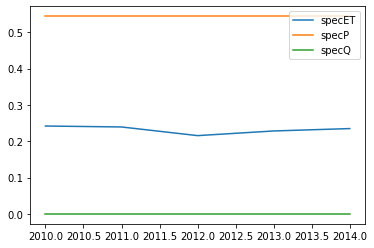

In [48]:
plt.plot(end_years_list,specETs,label ='specET')
plt.plot(end_years_list,specPs,label ='specP')
plt.plot(end_years_list,specQs,label ='specQ')
plt.legend()

In [49]:
# save correction factors 
df = pd.DataFrame(list(zip(end_years_list,Pcfs)),columns = ['wy','cf'])
df

,wy,cf
0,2010,2.248797
1,2011,2.273335
2,2012,2.524710
3,2013,2.382887
4,2014,2.316220


(2.3491896778308075, 2.3162199086237214)

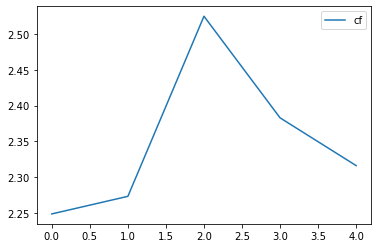

In [50]:
df.cf.plot(label = 'cf',legend=True)
df.cf.mean(),df.cf.median()

In [51]:
df.to_csv(datapath+'prec_cf_wy'+st_dt[:4]+'_'+ed_dt[:4]+'.csv')